# _ISYE 6740 Homework 4_
## _Name_

## 1. SVM (30 points)
> (a) (10 points) Explain why can we set the margin $c = 1$ to derive the SVM formulation?

#### Answer
> First, we know that $ w^t x + b = c$, and therefore, when c scales, $ w^t x + b$ scales simultaneously too. So the scaling factor of $c$ will eventually be cancelled out in the $$ min \frac{||\mathbf{w^t x + b}||}{||\mathbf{w}||}$$\
Second, when we are trying to $$ min \frac{||\mathbf{w^t x + b}||}{||\mathbf{w}||}$$ we know that for the numerator: $min{||\mathbf{w^t x + b}||}$ we are essentially looking for the point(s) lying on the data boundary to hold the support vector. And no matter what the $c$ is, we are always going to be able to find at least one point. That means the numerator is not relavant in this minimization process, and we can purely focus on $min ||w||$

> (b) (10 points) Using Lagrangian dual formulation, show that the weight vector can be represented as
$$w = \sum_{i=1}^n \alpha_i y_i x_i.$$
where $\alpha_i \geq 0$ are the dual variables. What does this imply in terms of how to relate data to $w$?

#### Answer
>The optimal $w$ is expressed in the form of the product of dual variables, the response variable, and the feature data. This implies that when plug in the $w$ back into the formula for the support vectors, we are going to get the inner product form of the original dataset, multiplied by the dual variables.

> (c) (10 points) Explain why only the data points on the ``margin'' will contribute to the sum above, i.e., playing a role in defining $w$. Hint: use the Lagrangian multiplier derivation and KKT condition we discussed in class. 

#### Answer
>According to the KKT conditions, we have to satisfy the complimentary slackness, which means that the product of the dual variable and the inequality constraint cannot be zero at the same time. At the optimal solution, the slack terms, in this case, the inequality terms will need to equal to zero in order to make sure that the primal and the dual feasibility holds, that is their optimal values are the same. \
\
Based on this, we know that only the points on the support vectors are the optimal solutions, and thus, the $w^T x + b - c$ term will equal to zero, and in order to make the whole term zero, we need to make $\alpha$ a positive number. Whereas the points not on the support vectors will have $w^T x + b - c \geq 0$, and thus we will need to make their $\alpha$ to zero.\
\
Going back to the sum term above, because we have the points on the support vector with non-zero $\alpha$s, and the other points with $\alpha = 0$, only those points on the boundary will contribute to the summation.

## 2. Simple SVM by hand. (20 points)

Suppose we only have four training examples in two dimensions as shown in Fig. The positive samples at $x_1 = (0, 0)$, $x_2 = (2, 2)$ and negative samples at $x_3 = (h, 1)$ and $x_4 = (0, 3)$. 

<table><tr><td><img src='svm.png'></td></tr></table>

> (a) (10 points) For what range of parameter $h > 0$, the training points are still linearly separable?

#### Answer
> First, we can clearly see that the class boundary for the blue class is $ y = x$. And since $h>0$, so even at its limit, that is, for point $(0,1)$, we still have its distance to the blue class of $\frac{\sqrt{2}}{2}$, whereas point $(0,3)$ has a distance to the blue point of $\frac{3\sqrt{2}}{2}$.\
\
Since at $h$'s boundary condition, the point's distance to the blue class is still less than the point $(0,3)$, this means that the point $(h,1)$ will be the only possible point that touches or cross the boundary of the blue class. In this case, the boundary condition for $h$ is when $h = 1$. Therefore, in order for the red class to be separated from the blue, $ 0<h<1$.



> (b) (10 points) Does the orientation of the maximum margin decision boundary change as $h$ changes, when the points are separable?

#### Answer
> Although the above mentioned class boundary is not the decision boundary, but we can infer from the blue class that in order for the blue class to be separable, the support vector on the blue side will either have its $w < 1$ when it only passes through point $(0,0)$, or have its $w>1$ when it only passes through point $(2,2)$. Either way, the support vector will renders the decision boundary to move even closer to point $(h,1)$ before it reaches point $(0,3)$, as we know the decision boundary and the support vectors are parallel lines.\
\
What this implies is that, either way, point$(h,1)$ will be the point to hold the support vector of the red class. \
\
In the meantime, as is explained above, all the other possible support vectors for the blue class except $y = x$ will render a shorter distance to the red class, which is not what we want, because in SVM, we want to maximize the class gap. Therefore, $y = x$, as we know it, is the furthest the support vector it can go before it becomes unable to separate the two classes, and will also always be the support vector for the blue class. Thus, we can naturally derive that the decision boundary will also have $w = 1$ unchanged regardless of $h$ even if we know point$(h,1)$ will be the point that holds the support vector on the red side.

## 3. Neural Networks (20 points)

> (a) (10 points)
Consider a neural networks for a binary classification using sigmoid function for each unit. If the network has no hidden layer, explain why the model is equivalent to logistic regression. 

#### Answer
> In neural networks, we are trying to $$min\; \ell(w, \alpha, \beta) = \sum_{i=1}^m (y^i - \sigma(w^T z^i))^2$$
where $z^i_1 = \sigma(\alpha^T z^i)$ and $z^i_2 = \sigma(\beta^T z^i)$ from the previous iterations, and $\alpha$ and $\beta$ are the weights for the different logistic regression models. \
\
When we do not have a hidden layer, this means that we no longer fit the data using different parameters of the logistic regression model and combine their weighed results together. \
\
Therefore, we don't subsititue $\sigma(\beta^T z^i)$ with the results from previous rounds, and directly minimize the $l$ function. 
\begin{align}
\min\; \ell(w, \alpha, \beta) = \sum_{i=1}^m (y^i - \sigma(w^T x^i))^2\\
\ =\sum_{i=1}^m (y^i)^2 + \sigma(w^T x^i)^2 - 2y^i\sigma(w^T x^i)\\
\ = \sum_{i=1}^p (y^i)^2 + \sigma(w^T x^i)^2 - 2\sigma(w^T x^i)\\ 
\ = \sum_{i=1}^p (\sigma(w^T x^i) - 1)^2 -1
\end{align}
\
The $p$ stands for the data which has a response $y^i$ of 1. Those whose response is 0 are left out of the equation since their product with the sigmoid function will still be 0.\
\
Taking the derivative for the above formula, we get
$$l' = 2(\sigma(w^T z^i) - 1)$$
and since $\sigma$ will always be between 0 and 1, therefore the above derivative will always be negative, meaning that the original $l$ function is decreasing monotonically.
\begin{align}
\min\; g = \sum_{i=1}^p (\sigma(w^T z^i) - 1)^2 -1\\
\ = min\; \sum_{i=1}^p \frac{\exp^2}{(1+\exp)^2} -1\\
\ = min\; \sum_{i=1}^p - \frac{2\exp + 1}{(1+\exp)^2}\\
\ = - max\; \sum_{i=1}^p \frac{2\exp + 1}{(1+\exp)^2}\\
\end{align}
Getting the derivation of the above $g$ function, we get
\begin{align}
\ g' = \sum_{i=1}^p \frac{2\exp}{(1+\exp)^2} - \frac{2\exp(2\exp+1)}{(1+\exp)^3}\\
\ = \sum_{i=1}^p \frac{-2\exp^2}{(1+\exp)^3} \leq 0\\
\end{align}
So this $$max \;g = \sum_{i=1}^p \frac{2\exp + 1}{(1+\exp)^2}$$ function is a monotonically decreasing function, and we can for sure obtain a maximum value at a given range. This is esentially equivalent to the maximum log-likelihood function used in the pure logistic regression solver, although the equation looks different, but in the end, we are looking for the same goal.

> (b) (10 points) 
Consider a simple two-layer network in the lecture slides. Given $m$ training data $(x^i, y^i)$, $i = 1, \ldots, m$, the cost function used to training the neural networks
$$\ell(w, \alpha, \beta) = \sum_{i=1}^m (y^i - \sigma(w^T z^i))^2$$

>where $\sigma (x) = 1/(1+e^{-x})$ is the sigmoid function, $z^i$ is a two-dimensional vector such that  $z_1^i = \sigma(\alpha^T x^i)$, and $z_2^i = \sigma(\beta^T x^i)$. Show the that the gradient is given by
$$\frac{\partial \ell(w, \alpha, \beta) }{\partial w}
= - \sum_{i=1}^m 2(y^i - \sigma(u^i))\sigma(u^i)(1-\sigma(u^i)) z^i,
$$
where $u^i = w^T z^i$. Also find the gradient of $\ell(w, \alpha, \beta)$ with respect to $\alpha$ and $\beta$ and write down their expression.
\end{enumerate}

#### Answer

>
\begin{align}
\frac{\partial \ell(w, \alpha, \beta) }{\partial w} &= - \sum_{i=1}^m 2(y^i - \sigma(w^T z^i))[\sigma(w^T z^i)]'(w^T z^i)'
&= - \sum_{i=1}^m 2(y^i - \sigma(u^i))\sigma(u^i)(1-\sigma(u^i)) z^i
\end{align}

\begin{align}
\frac{\partial \ell(w, \alpha, \beta) }{\partial \alpha} &= - \sum_{i=1}^m 2(y^i - \sigma(w^T z^i))[\sigma(w^T z^i)]'(w^T z^i)'\\
&= - \sum_{i=1}^m 2(y^i - \sigma(u^i))\sigma(u^i)(1-\sigma(u^i)) z^i
\end{align}

## 4. Comparing SVM and simple neural networks (30 points)

This question is to implement and compare **SVM and simple neural networks** for the same datasets we tried for the last homework (so in the end, we have compared 5 classification algorithms on two datasets). We suggest to use *Scikit-learn*, which is a commonly-used and powerful *Python* library with various machine learning tools. But you can also use other similar libraries in other programming languages of your choice to perform the tasks. 

You may use a neural networks function **sklearn.neural\_network** with **hidden\_layer\_sizes=(5, 2)**. Tune the step size so you have reasonable results. You may use **svc** and tune the penalty term $C$ to get reasonable results. 

### Part One (Divorce classification/prediction) (20 points)

We will compare using the same dataset as the last homework, which is about participants who completed the personal information form and a divorce predictors scale. 

The data is a modified version of the publicly available at \url{https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set} (by injecting noise so you will not replicate the results on uci website). There are 170 participants and 54 attributes (or predictor variables) that are all real-valued. The dataset was the same as the last homework. The last column of the CSV file is label $y$ (1 means \``divorce'', 0 means \``no divorce''). Each column is for one feature (predictor variable), and each row is a sample (participant). A detailed explanation for each feature (predictor variable) can be found at the website link above. Our goal is to build a classifier using training data, such that given a test sample, we can classify (or essentially predict) whether its label is 0 (\``no divorce'') or 1 (``divorce''). 

Build two classifiers using SVM and a simple neural networks. First random shuffle the data set. Then use the first $80\%$ data for training and the remaining $20\%$ for testing. If you use **scikit-learn** you can use **train\_test\_split** to split the dataset. 

> (a) (10 points) Report testing accuracy for each of the two classifiers.  Comment on their performance: which performs better and make a guess why it performs better in this setting.

In [1]:
import csv
import os
import numpy as np
import pandas as pd

base_path = os.getcwd()

file_path = os.path.join(base_path, "", "marriage.csv")

marriage = pd.read_csv(file_path, sep = ",",header=None)
marriage

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.560903,3.681587,3.450467,3.211998,-1.203045,0.597706,-0.970093,-0.750970,-0.511495,-0.133660,...,2.077401,1.184182,3.955069,2.608046,2.303629,1.721660,3.275018,1.761019,1.215237,1.0
1,4.153272,5.173858,4.100690,2.580173,3.305788,-1.505512,-0.029398,5.702657,2.230281,4.975496,...,3.467076,2.451984,3.504294,5.324240,4.480607,5.375248,2.270379,2.167944,2.191214,1.0
2,2.226241,1.575322,2.389117,2.725405,-0.304562,2.832803,1.787779,0.565755,1.328212,2.335353,...,1.200917,1.241794,2.207492,1.228034,0.870052,1.685040,2.341985,-0.444320,2.527452,1.0
3,3.553458,2.859042,2.928414,1.833241,1.271119,4.165213,2.078597,4.506175,2.521628,2.747315,...,3.196291,2.204824,3.664982,3.689508,2.577677,3.171884,2.164660,1.813024,1.376033,1.0
4,0.506547,1.419223,1.716153,1.319274,2.853840,0.047412,-0.016515,0.620795,1.202992,0.078347,...,1.806657,2.085539,2.012551,1.899477,1.510134,1.373350,2.551119,0.846321,-0.066858,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,-1.845462,-0.808531,0.309481,-0.979520,-0.556496,-0.395338,-0.502979,-0.798474,-1.473114,2.428689,...,1.021530,-0.108714,2.308311,-0.287032,0.046402,4.702990,4.814076,2.510736,2.225078,0.0
166,0.337077,-0.483750,0.823365,0.563178,-1.270118,0.978814,-1.027141,-0.581733,-1.338374,0.463138,...,3.182008,3.265522,2.005206,1.943546,4.070406,2.555771,4.383673,1.294633,2.477147,0.0
167,2.304462,1.844857,-0.095230,-0.405619,1.179862,1.226855,1.384235,-0.206427,1.973713,1.940605,...,1.907090,0.239489,1.249397,-0.077476,1.429052,-0.067223,5.132404,-0.871550,-0.637281,0.0
168,0.369439,0.063279,-0.466090,0.017346,-1.197056,0.038995,1.735441,1.037408,0.183137,0.333348,...,2.893040,4.305077,4.685423,1.695163,1.297874,2.588636,4.544230,3.209139,0.094538,0.0


In [60]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split 
x = marriage.iloc[:,:-1]
y = marriage.iloc[:,-1]

In [23]:
rs = ShuffleSplit(n_splits=5, test_size=.2, random_state=0)

indexlist = []

for train_index, test_index in rs.split(x):
    tempdict = {}
    tempdict['train'] = train_index
    tempdict['test'] = test_index
    indexlist.append(tempdict)


#print(indexlist)

In [28]:
train_data = x.iloc[indexlist[0]['train']]
train_response = y.iloc[indexlist[0]['train']]
test_data = x.iloc[indexlist[0]['test']]
test_response = y.iloc[indexlist[0]['test']]

### SVM

In [31]:
classifier = svm.SVC(gamma=0.001)

classifier.fit(train_data, train_response)

predicted = classifier.predict(test_data)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(test_response, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_response, predicted))

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        16
         1.0       1.00      0.89      0.94        18

    accuracy                           0.94        34
   macro avg       0.94      0.94      0.94        34
weighted avg       0.95      0.94      0.94        34


Confusion matrix:
[[16  0]
 [ 2 16]]


### Neural Network

In [34]:
from sklearn.neural_network import MLPClassifier

classifier_nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 5), random_state=1)

classifier_nn.fit(train_data, train_response)

predict_nn = classifier_nn.predict(test_data)

predict_nn

array([0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.])

In [36]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier_nn, metrics.classification_report(test_response, predict_nn)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_response, predict_nn))

Classification report for classifier MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False):
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91        16
         1.0       0.94      0.89      0.91        18

    accuracy                           0.91        34
   macro avg       0.91      0.91      0.91        34
weighted avg       0.91      0.91      0.91        34


Confusion matrix:
[[15  1]
 [ 2 16]]


### Analysis: Compare the two classification methods on the divorce data
> The result of the SVM and Neural Network shows that SVM performs slightly better. It correctly classifies all the "1"s. In this setting where the dimensions are high relative to the number of data points, so using the neural network which assigns weights to the features might have some issues with the linear dependency of each feature. 

> (b) (10 points) Use the first two features to train two new classifiers. Plot the data points and decision boundary of each classifier. Comment on the difference between the decision boundary for the two classifiers. Please clearly represent the data points with different labels using different colors.

In [37]:
train_data = x.iloc[indexlist[0]['train'],:2]
train_response = y.iloc[indexlist[0]['train']]
test_data = x.iloc[indexlist[0]['test'],:2]
test_response = y.iloc[indexlist[0]['test']]

In [38]:
classifier = svm.SVC(gamma=0.001)

classifier.fit(train_data, train_response)

predicted = classifier.predict(test_data)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(test_response, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_response, predicted))

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

         0.0       0.78      0.88      0.82        16
         1.0       0.88      0.78      0.82        18

    accuracy                           0.82        34
   macro avg       0.83      0.83      0.82        34
weighted avg       0.83      0.82      0.82        34


Confusion matrix:
[[14  2]
 [ 4 14]]


In [98]:
from sklearn.neural_network import MLPClassifier

classifier_nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

classifier_nn.fit(train_data, train_response)

predict_nn = classifier_nn.predict(test_data)

predict_nn

print("Classification report for classifier %s:\n%s\n"
      % (classifier_nn, metrics.classification_report(test_response, predict_nn)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_response, predict_nn))

Classification report for classifier MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False):
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85        16
         1.0       0.88      0.83      0.86        18

    accuracy                           0.85        34
   macro avg       0.85      0.85      0.85        34
weighted avg       0.85      0.85      0.85        34


Confusion matrix:
[[14  2]
 [ 3 15]]


In [99]:
train_data.to_numpy().shape

(136, 2)

In [100]:
x_min, x_max = train_data.to_numpy()[:, 0].min() - 1, train_data.to_numpy()[:, 0].max() + 1
y_min, y_max = train_data.to_numpy()[:, 1].min() - 1, train_data.to_numpy()[:, 1].max() + 1
h = .02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['svm','neural network']

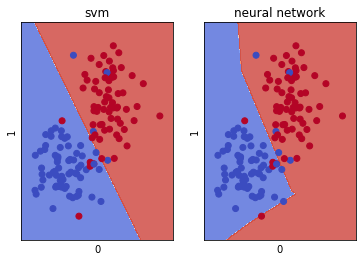

In [101]:
for i, clf in enumerate((classifier.fit(train_data, train_response), classifier_nn.fit(train_data, train_response))):
    plt.subplot(1, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(train_data.to_numpy()[:, 0], train_data.to_numpy()[:, 1], c=train_response, cmap=plt.cm.coolwarm)
    plt.xlabel('0')
    plt.ylabel('1')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

### Analysis:Compare the two classification boundaries
> We can see that the boundary of SVM is a straight line, which is consistent with the concept of Support Vector. 
> The boundary of the neural network here is a zigzag line, and the reason is because it combines multiple logistic regression models and go through multiple layers. Each layer will renders a weighed combination of logistic regression model that will serve as the data for the next layer. So eventually, the data has been transformed, which is why the boundary do not come in a straight line. 

### Part Two (Handwritten digits classification) (10 points)

> (10 points) Repeat the above part (a) using the **MNIST Data** in our **Homework 3**. Here, give \``digit'' 6 label $y = 1$, and give ``digit'' 2 label $y = 0$. All the pixels in each image will be the feature (predictor variables) for that sample (i.e., image). Our goal is to build classifiers such that given a new testing sample, we can tell it is a 2 or a 6. Using the first $80\%$ of the samples for training and remaining $20\%$ for testing. Report the classification accuracy on testing data, for each of the two classifiers. Comment on their performance: which performs better and make a guess why they perform better in this setting.

In [90]:
from scipy.io import loadmat
raw_data = loadmat(os.path.join(base_path, "", "data.mat"))

images = raw_data['data']
images_t = images.transpose()

labels = loadmat('C:/Users/pjgab/Desktop/OMA/CSE6740/homework2/hw2/data/label.mat')
labels = labels['trueLabel']

labels_re = np.where(labels == 2, -1, 1).flatten()

In [94]:
img_train, img_test, digit_train, digit_test = train_test_split(images_t, labels_re, test_size=0.2, random_state=99)

### SVM

In [95]:
classifier = svm.SVC(gamma=0.001)

classifier.fit(img_train, digit_train)

predicted = classifier.predict(img_test)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(digit_test, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(digit_test, predicted))

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       221
           1       0.95      0.98      0.96       177

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398


Confusion matrix:
[[212   9]
 [  4 173]]


### Neural Network

In [97]:
classifier_nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(200, 50), random_state=10)

classifier_nn.fit(img_train, digit_train)

predict_nn = classifier_nn.predict(img_test)

predict_nn

print("Classification report for classifier %s:\n%s\n"
      % (classifier_nn, metrics.classification_report(digit_test, predict_nn)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(digit_test, predict_nn))

Classification report for classifier MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(200, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=10, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False):
              precision    recall  f1-score   support

          -1       1.00      0.98      0.99       221
           1       0.98      0.99      0.99       177

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398


Confusion matrix:
[[217   4]
 [  1 176]]


### Analysis: Compare the two classification methods on the MNIST data
> Here, the neural network classification method has a slightly higher performance than the svm. The reason for this might be due to the data itself is very sparsly distributed in the data space, and therefore, the support vector might have difficulties separating the two classes. 